In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)

In [2]:
#data from https://www.dhs.gov/immigration-statistics/refugees-asylees
df_13 = pd.read_excel('C:\\Users\\ighos\\OneDrive\\Documents\\Portfolio\\US Asylum\\fy2021_table13.xlsx')
df_14d = pd.read_excel('C:\\Users\\ighos\\OneDrive\\Documents\\Portfolio\\US Asylum\\fy2021_table14d.xlsx')
df_16 = pd.read_excel('C:\\Users\\ighos\\OneDrive\\Documents\\Portfolio\\US Asylum\\fy2021_table16.xlsx')
df_17d = pd.read_excel('C:\\Users\\ighos\\OneDrive\\Documents\\Portfolio\\US Asylum\\fy2021_table17d.xlsx')
df_19d = pd.read_excel('C:\\Users\\ighos\\OneDrive\\Documents\\Portfolio\\US Asylum\\fy2021_table19d.xlsx')

In [3]:
#getting refugee arrivals by region into a separate table 'refugees_region'
df_14d = df_14d.drop([0,1,80,81,82,83,84,85])
df_14d = df_14d.reset_index(drop = True)
rows_to_copy = [3,4,5,6,7,8,9]
refugees_region = df_14d.iloc[rows_to_copy].copy()
refugees_region.columns = ['Region', '2012-ref', '2013-ref', '2014-ref', '2015-ref', '2016-ref', '2017-ref', '2018-ref',\
                             '2019-ref', '2020-ref', '2021-ref']
# '-' means 0 in this dataset
refugees_region = refugees_region.replace('-', 0)
refugees_region = refugees_region.reset_index(drop = True)

In [4]:
#getting refugee arrivals by country into a separate table 'refugees_country'
refugees_country = df_14d.drop(df_14d.index[0:12]).reset_index(drop = True)
refugees_country.columns = ['Country', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
refugees_country = refugees_country.replace('-', 0)
# D means data witheld to limit disclosure, for now changing it to None
columns_to_replace = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
refugees_country[columns_to_replace] = refugees_country[columns_to_replace].replace('D', None)

In [5]:
#creating table 'refugees_arrivals_by_year'
df_13 = df_13.drop([0,1,2,45,46])
df_13 = df_13.rename(columns={"Table 13.": "Year", "Unnamed: 1": "Number"}).reset_index(drop = True)
refugees_arrivals_by_year = df_13

In [6]:
#creating table 'asylum_granted_by_year'
df_16 = df_16.drop([0,1,2,35])
df_16 = df_16.rename(columns={"Table 16.": "Year", "Unnamed: 1": "Total", "Unnamed: 2": "Affirmative", 
"Unnamed: 3": "Defensive" }).reset_index(drop = True)
asylum_granted_by_year = df_16

In [7]:
#creating table 'affirmative_asylum_by_region'
rows_to_copy = [5,6,7,8,9,10,11]
affirmative_asylum_by_region = df_17d.iloc[rows_to_copy].copy()
affirmative_asylum_by_region.columns = ['Region','2012-aff', '2013-aff', '2014-aff', '2015-aff', '2016-aff',\
                                        '2017-aff', '2018-aff', '2019-aff', '2020-aff', '2021-aff']
affirmative_asylum_by_region = affirmative_asylum_by_region.reset_index(drop = True)
columns_to_replace = ['2012-aff', '2013-aff', '2014-aff', '2015-aff', '2016-aff',\
                    '2017-aff', '2018-aff', '2019-aff', '2020-aff', '2021-aff']
affirmative_asylum_by_region[columns_to_replace] = affirmative_asylum_by_region[columns_to_replace].replace('D', None)

In [8]:
#creating table 'affirmative_asylum_by_country'
affirmative_asylum_by_country = df_17d.drop(df_17d.index[0:14]) \
.reset_index(drop = True)
affirmative_asylum_by_country = affirmative_asylum_by_country.drop(affirmative_asylum_by_country.index[107:113]) \
.reset_index(drop = True)
affirmative_asylum_by_country.columns = \
['Country','2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
columns_to_replace = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
affirmative_asylum_by_country[columns_to_replace] = affirmative_asylum_by_country[columns_to_replace].replace('D', None)

In [9]:
#creating table 'defensive_asylum_by_region'
rows_to_copy = [5,6,7,8,9,10,11]
defensive_asylum_by_region = df_19d.iloc[rows_to_copy].copy()
defensive_asylum_by_region.columns = ['Region','2012-def', '2013-def', '2014-def', '2015-def', '2016-def', \
                                      '2017-def', '2018-def', '2019-def', '2020-def', '2021-def']
defensive_asylum_by_region = defensive_asylum_by_region.reset_index(drop = True)
columns_to_replace = ['Region','2012-def', '2013-def', '2014-def', '2015-def', '2016-def', \
                                      '2017-def', '2018-def', '2019-def', '2020-def', '2021-def']
defensive_asylum_by_region[columns_to_replace] = defensive_asylum_by_region[columns_to_replace].replace('D', None)
defensive_asylum_by_region = defensive_asylum_by_region.replace('-', 0)

In [10]:
#creating table 'defensive_asylum_by_country'
defensive_asylum_by_country = df_19d.drop(df_19d.index[0:14]) \
.reset_index(drop = True)
defensive_asylum_by_country = defensive_asylum_by_country.drop(defensive_asylum_by_country.index[87:94]) \
.reset_index(drop = True)
defensive_asylum_by_country.columns = \
['Country','2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
columns_to_replace = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
defensive_asylum_by_country[columns_to_replace] = defensive_asylum_by_country[columns_to_replace].replace('D', None)
defensive_asylum_by_country = defensive_asylum_by_country.replace('-', 0)

In [11]:
#creating a multi indexed table including all the information by region
import functools as ft
dfs = [refugees_region, affirmative_asylum_by_region, defensive_asylum_by_region]
df_region = ft.reduce(lambda left, right: pd.merge(left, right, on='Region'), dfs)
df_region.columns = pd.MultiIndex.from_tuples([(c.split('-')[0], c.split('-')[1]) if '-' in c else ('Region', c) \
                    for c in df_region.columns])
df_region = df_region.sort_index(axis=1)
first_column = df_region.pop('Region')
df_region.insert(0, 'Region', first_column)
df_region = df_region.T.reset_index()
df_region.columns = ['Year', 'Type', 'Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America', 'Unknown']
df_region = df_region.drop([0])

In [12]:
#formatting the table for visualization
df_region = df_region.melt(id_vars=['Year', 'Type'], var_name='Region', value_name='Number')
df_region['Region'] = df_region['Region'].apply(lambda x: x.split()[0])
df_region = df_region[['Year', 'Type', 'Region', 'Number']]
df_region['Number'] = pd.to_numeric(df_region['Number'], errors='coerce')

<AxesSubplot:xlabel='Year', ylabel='Number'>

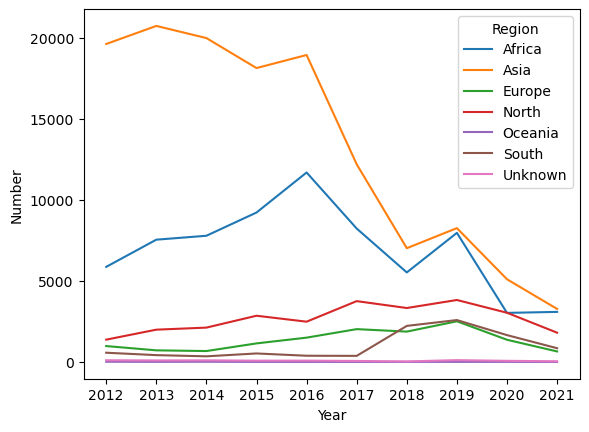

In [13]:
sns.lineplot(data=df_region, x="Year", y="Number", hue = "Region",  errorbar = None)

<AxesSubplot:xlabel='Year', ylabel='Number'>

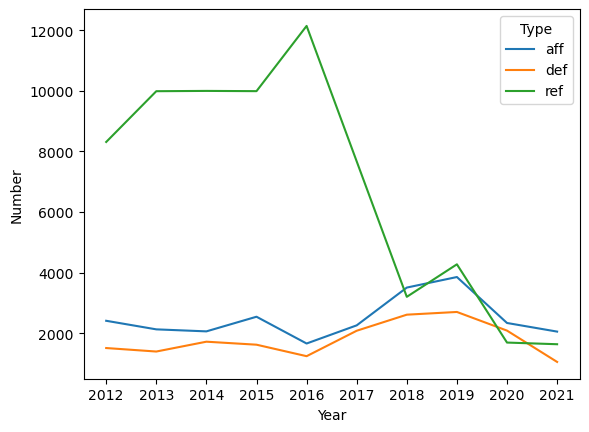

In [14]:
sns.lineplot(data=df_region, x="Year", y="Number", hue="Type", errorbar = None)

In [15]:
#creating a table including all the information by country
refugees_country['Type'] = 'ref'
affirmative_asylum_by_country['Type'] = 'aff'
defensive_asylum_by_country['Type'] = 'def'
refugees_country = refugees_country.melt(id_vars=['Country', 'Type'], var_name='Year', value_name='Number')
refugees_country['Year'] = refugees_country['Year'].str.extract(r'(\d+)')
affirmative_asylum_by_country = affirmative_asylum_by_country.melt(id_vars=['Country', 'Type'],  
                                                                   var_name='Year', value_name='Number')
affirmative_asylum_by_country['Year'] = affirmative_asylum_by_country['Year'].str.extract(r'(\d+)')
defensive_asylum_by_country = defensive_asylum_by_country.melt(id_vars=['Country', 'Type'],  
                                                                   var_name='Year', value_name='Number')
defensive_asylum_by_country['Year'] = defensive_asylum_by_country['Year'].str.extract(r'(\d+)')
refugees_country.merge(affirmative_asylum_by_country, how = 'outer', on = 'Year')
df_country = pd.concat([refugees_country, affirmative_asylum_by_country, defensive_asylum_by_country])
df_country['Number'].replace('-', 0, inplace=True)
df_country['Number'].replace('X', 0, inplace=True)
df_country['Number'].fillna(0, inplace=True)
df_country = df_country.reset_index(drop = True)

In [16]:
df_country

,Country,Type,Year,Number
0,Afghanistan,ref,2012,450.0
1,Angola,ref,2012,0.0
2,Armenia,ref,2012,8.0
3,Azerbaijan,ref,2012,10.0
4,Belarus,ref,2012,84.0
...,...,...,...,...
2595,Vietnam,def,2021,45.0
2596,Yemen,def,2021,13.0
2597,Zimbabwe,def,2021,0.0
2598,All other countries1,def,2021,63.0


In [17]:
#creating a table including common information by year
refugees_arrivals_by_year['Type'] = 'Refugee'
asylum_granted_by_year['Type'] = 'Asylum'
asylum_granted_by_year.drop(columns='Total', inplace=True)
asylum_granted_by_year = asylum_granted_by_year.melt(id_vars=['Year'], var_name='Type', value_name='Number')
asylum_granted_by_year['Type'] = asylum_granted_by_year['Type'].map({'Affirmative': 'Affirmative', 'Defensive': 'Defensive'})
asylum_granted_by_year = asylum_granted_by_year.drop(asylum_granted_by_year.index[64:97]).reset_index(drop = True)
df_year = pd.concat([refugees_arrivals_by_year, asylum_granted_by_year])

<function matplotlib.pyplot.show(close=None, block=None)>

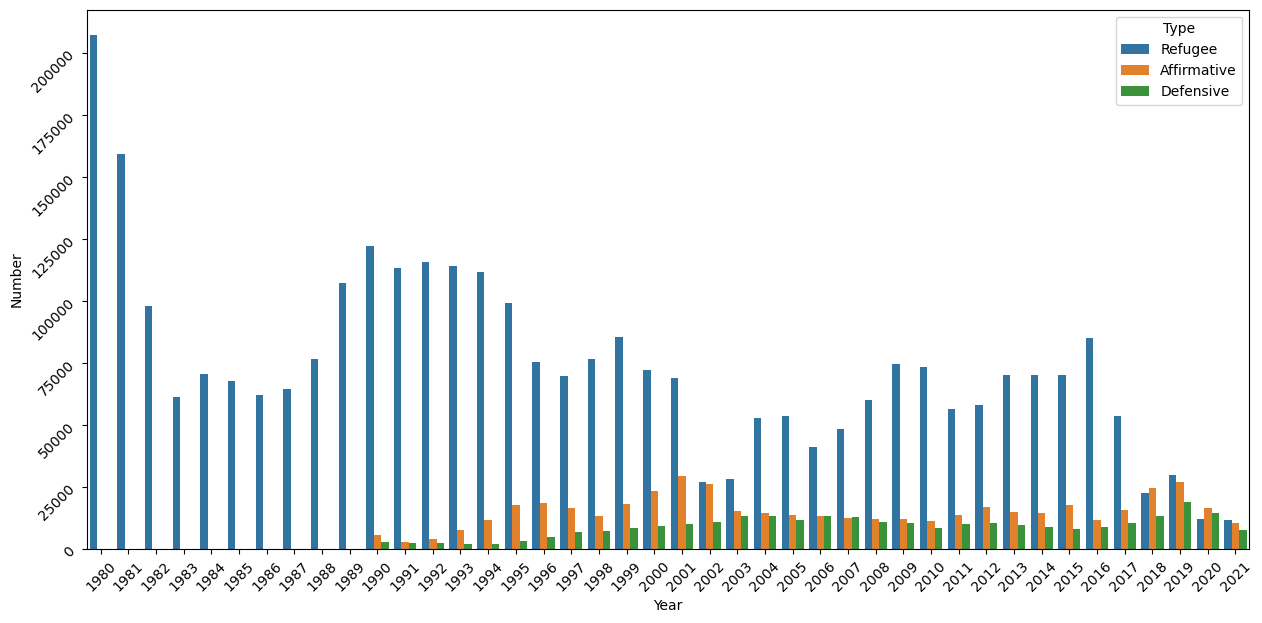

In [31]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(data=df_year, x="Year", y="Number", hue="Type", errorbar = None)
ax.tick_params(labelrotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

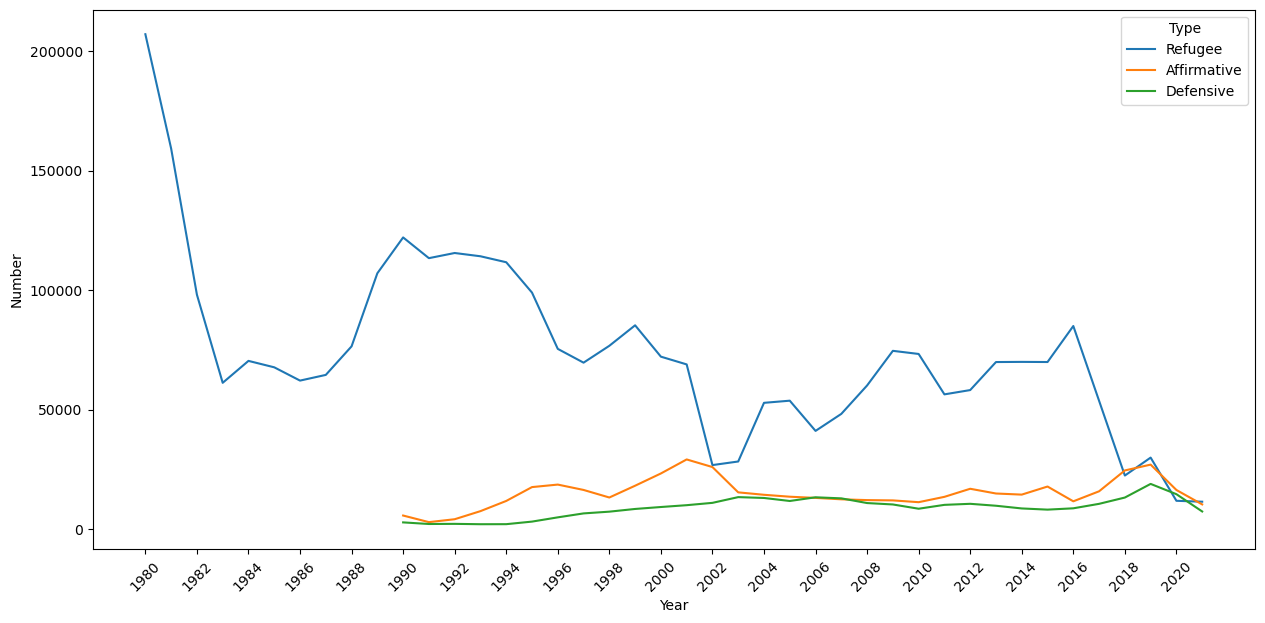

In [35]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.lineplot(data=df_year, x="Year", y="Number", hue="Type", errorbar = None)
current_ticks = plt.xticks()[0]
desired_ticks = list(range(1980, 2022,2))
plt.xticks(desired_ticks, rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

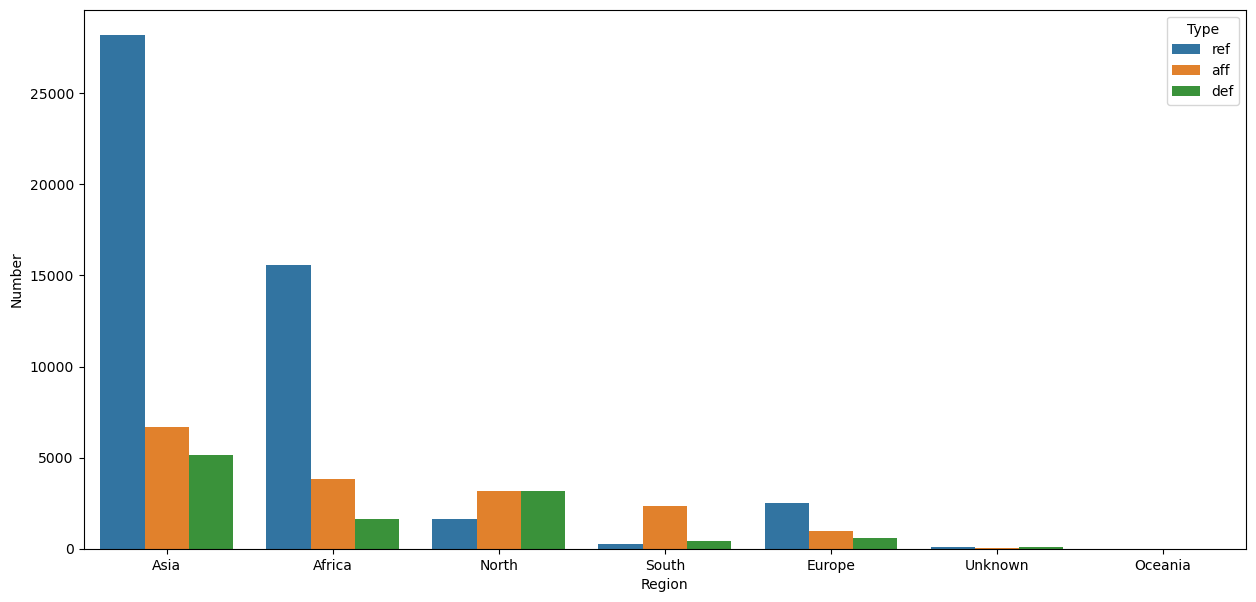

In [43]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(data=df_region.sort_values(by = 'Number', ascending = False), x="Region", y="Number", hue="Type", errorbar = None)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

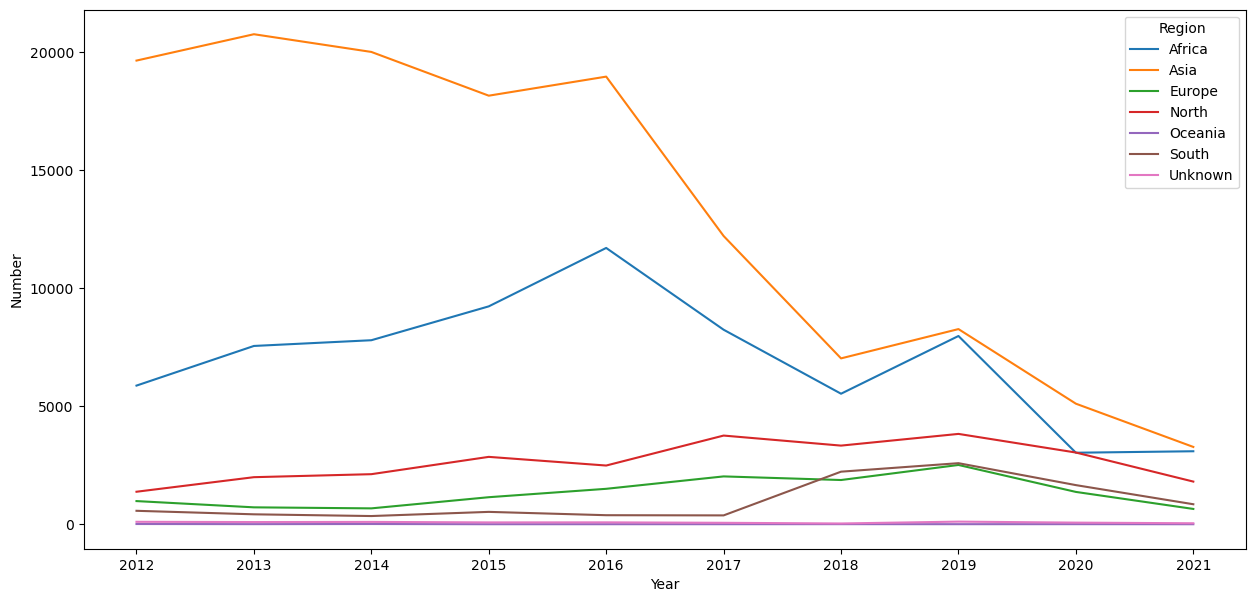

In [50]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.lineplot(data=df_region, x="Year", y="Number", hue="Region", errorbar = None)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

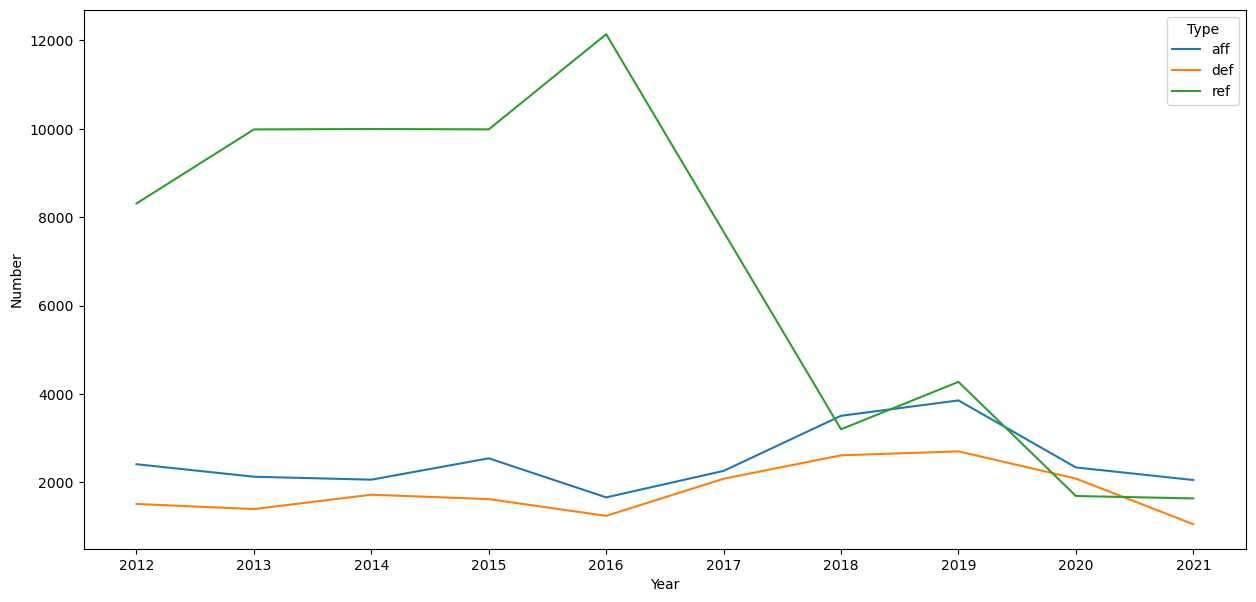

In [51]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.lineplot(data=df_region, x="Year", y="Number", hue="Type", errorbar = None)
plt.show